# Deep Learning for cell segmentation

# **Attention!** If Using Google Colab, change runtime to GPU. Both Cellpose and Stardist can be accelarated by GPU's.
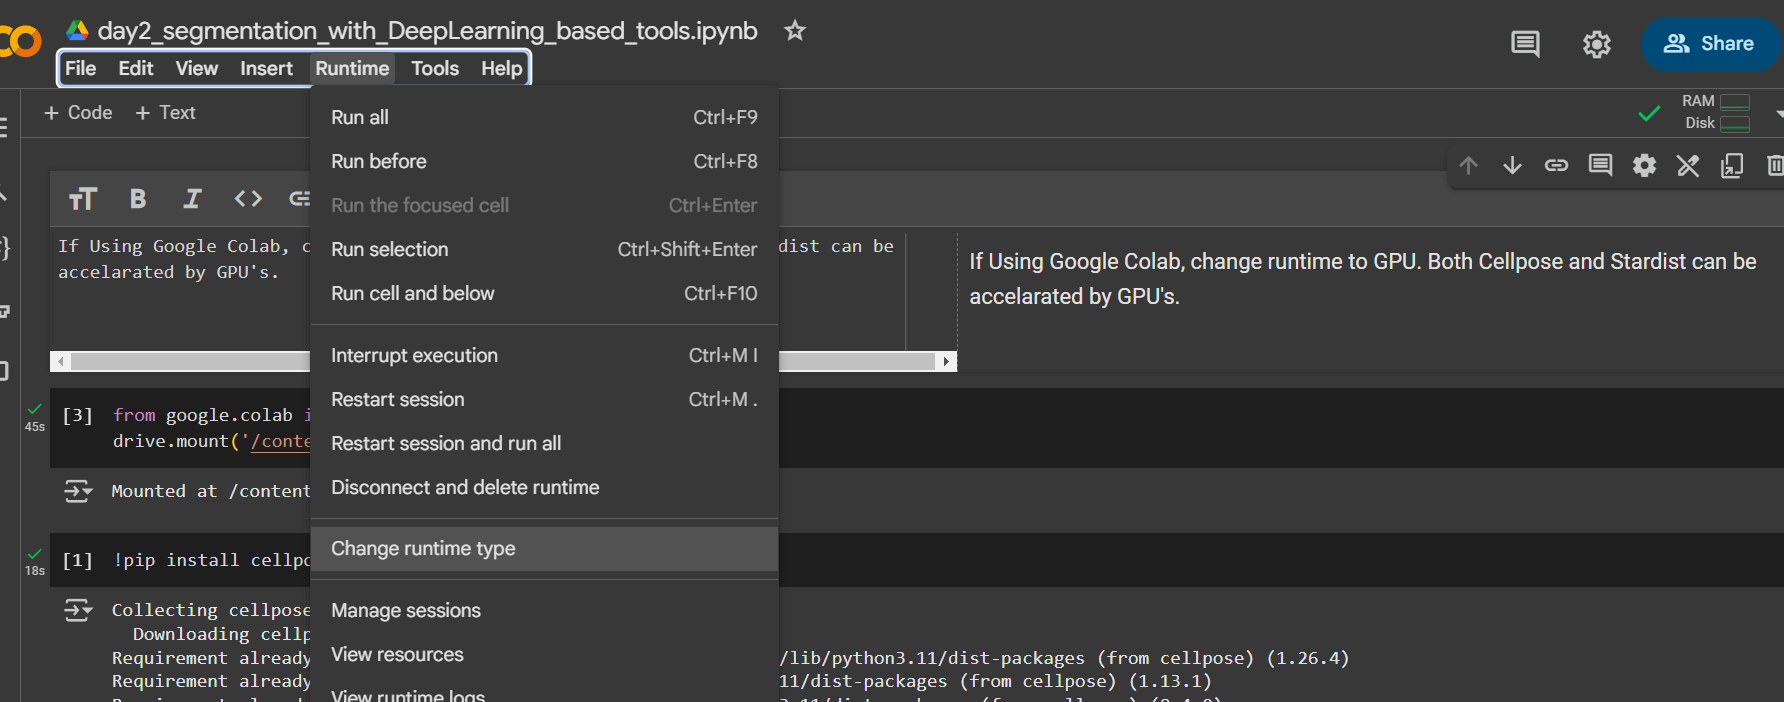


In [ ]:
#Only execute this cell if using Google Colab
from google.colab import drive
drive.mount('/content/drive')





# StarDist: Object Detection-Based Cell Segmentation

**StarDist** is a deep-learning-based method for **cell and nucleus segmentation**, particularly effective for star-convex shapes such as nuclei in microscopy images. Instead of pixel-wise classification, it predicts star-shaped polygons around objects, improving segmentation accuracy in crowded and overlapping regions.

## Features:
- **Optimized for nuclei segmentation** in 2D & 3D images.
- **Pre-trained models** available for various microscopy datasets.
- **Handles crowded cells** better than traditional methods.
- **Python API & ImageJ plugin** support.

** In the links below, you will find more information about Stardist

https://github.com/stardist/stardist
https://www.youtube.com/watch?v=Amn_eHRGX5M
 https://raw.githubusercontent.com/stardist/stardist/master/images/overview_2d.png h 2020

In [ ]:
#Only execute this cell if using Google Colab
!pip install stardist

In [ ]:
from stardist.models import StarDist2D
from stardist.plot import render_label
from csbdeep.utils import normalize

In [ ]:
#see all pre-trained models
StarDist2D.from_pretrained()

In [ ]:
#load the model you want to use

model = StarDist2D.from_pretrained('2D_versatile_fluo')

In [ ]:
#Run stardist inference to generate label image
label_image_stardist, _ = model.predict_instances(normalize(img))

#Make folder and salve label image
label_folder_stardist = 'label_folder_stardist/'
!mkdir = label_folder_stardist
imsave(label_folder_stardist + 'label.tiff', label_image_stardist.astype('uint16'))


In [ ]:
# Convert the label image to an RGB image for visualization
label_image_original_stardist = color.label2rgb(label_image_stardist, image=img, bg_label=0, alpha=0.3)

# Display the label image
plt.figure(figsize=(8, 8))
plt.imshow(label_image_original_stardist)
plt.title("Original  and Label Image Stardist")
plt.axis("off")
plt.show()

In [ ]:
plt.figure(figsize=(8, 8))
plt.imshow(img, cmap= 'gray', vmax=200)
plt.title("Contours of Labels on Original Image - Stardist")

# Find and overlay contours
for region in range(1, label_image_stardist.max() + 1):  # Skip background (label 0)
    contours = find_contours(label_image_stardist == region, level=0.5)
    for contour in contours:
        plt.plot(contour[:, 1], contour[:, 0], color='red', linewidth=0.5)

# Remove axis for cleaner display
plt.axis("off")
plt.show()

# Cellpose: A Generalist Cell Segmentation Tool

**Cellpose** is a deep learning-based tool for **cell segmentation**, designed to work across various microscopy images without the need for extensive parameter tuning. It uses a neural network trained on a diverse dataset to accurately segment cells (cytoplasm or nucleus) of different shapes and sizes.
It works well even in tissues in cultures with high cell density.

## Features:
- **Pre-trained models** for different cell types.
- **User-friendly** interface with GUI and Python API.
- **Custom training** for specific datasets.
- **Robust segmentation** even in challenging imaging conditions.


**links for learning more about Cellpose:**

https://www.youtube.com/watch?v=NcC0YxQ9o3A

https://www.nature.com/articles/s41592-020-01018-x
https://www.cellpose.org/

https://cellpose.readthedocs.io/en/latest/

https://cellpose.readthedocs.io/en/latest/notebook.html

https://www.nature.com/articles/s41592-020-01018-x

In [ ]:
#Only execute this cell if you are using Google Colab or do not have Cellpose alreadt installed in your local environment
!pip install cellpose

In [ ]:
#import packages
import os
import glob
import matplotlib.pyplot as plt
# from cellpose import models, io
from skimage.io import imread, imshow, imsave
from skimage.measure import find_contours
import matplotlib
from skimage import color


In [ ]:
print(os.getcwd())

In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/QBQ5915_material/BBBC013_v1_images_bmp/')
print(os.getcwd())

In [ ]:
img = imread('BBBC013_tiff/Channel2-03-A-03.tiff')

In [ ]:
img.shape

In [ ]:

plt.imshow(img, cmap='gray')
plt.axis("off")

In [ ]:
label_folder = 'label_folder/'
!mkdir = label_folder


In [ ]:
model = models.Cellpose(gpu=True, model_type= 'nuclei')

# apply model

channels = [0,0] # This means we are processing single channel greyscale images.
label_image, flows, styles, diams = model.eval(img, flow_threshold=0.8, diameter=10, channels=channels)


imsave(label_folder + 'label.tiff', label_image.astype('uint16'))
# show result


In [ ]:
plt.imshow(label_image)

In [ ]:
# Convert the label image to an RGB image for visualization
label_image_original = color.label2rgb(label_image, image=img, bg_label=0, alpha=0.3)

# Display the label image
plt.figure(figsize=(8, 8))
plt.imshow(label_image_original)
plt.title("Original  and Label Image Merged")
plt.axis("off")
plt.show()

In [ ]:
plt.figure(figsize=(8, 8))
plt.imshow(img, cmap= 'gray')
plt.title("Contours of Labels on Original Image")

# Find and overlay contours
for region in range(1, label_image.max() + 1):  # Skip background (label 0)
    contours = find_contours(label_image == region, level=0.5)
    for contour in contours:
        plt.plot(contour[:, 1], contour[:, 0], color='red', linewidth=0.5)

# Remove axis for cleaner display
plt.axis("off")
plt.show()

# Now, it is you!. Write a code comparing the results of Cellpose and Stardist




In [ ]:
#Write your code here